# **MNIST Handwritten Digit Recognition**
---
---

### **Importing libraries**
--- 

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline

### **Loading the MNIST datasets**
---

In [8]:
data_df = pd.read_csv("dataset\data.csv")
#test_df = pd.read_csv("dataset\test.csv")

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Vaibhav Tandon\AppData\Local\Temp\ipykernel_23772\2970709147.py:1: SyntaxWarning: invalid escape sequence '\d'
  data_df = pd.read_csv("dataset\data.csv")


In [9]:
data_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# test_df.head()

#### For train and test both we will use data.csv (Taking train data as complete data)

In [13]:
data_df.shape

(42000, 785)

### **Data Preparation for Model Building**
---

In [14]:
y=data_df['label']
x=data_df.drop('label',axis=1)

In [15]:
#x_for_test_data=test_df[:]

In [16]:
type(x)

pandas.core.frame.DataFrame

3


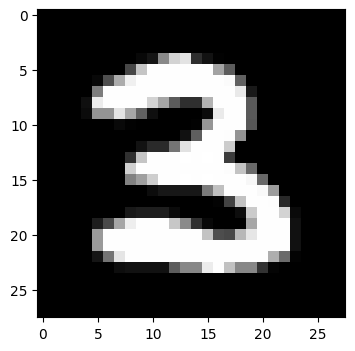

In [47]:
# plt.figure(figsize=(7,7))
# some_digit=1266
# some_digit_image = x.iloc[some_digit].to_numpy()
# plt.imshow(np.reshape(some_digit_image, (28,28)))
# print(y[some_digit])

import random
# Assuming x and y are defined, and x contains image data, y contains labels
plt.figure(figsize=(4, 4))

# Get a random index from the range of your dataset
random_index = random.randint(0, len(x) - 1)

# Access the random digit and label
some_digit_image = x.iloc[random_index].to_numpy()
some_digit_label = y[random_index]

# Display the image and print the label
plt.imshow(np.reshape(some_digit_image, (28, 28)), cmap="gray")
print(some_digit_label)

<Axes: xlabel='label', ylabel='count'>

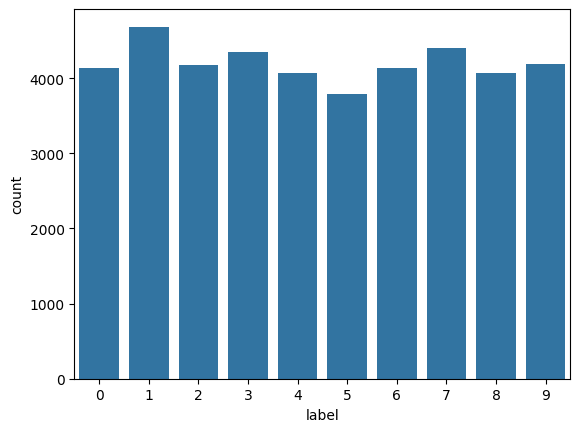

In [52]:
sns.countplot( x='label', data=data_df) 

#### we can conclude that our dataset is balanced

### **Splitting the train data into train and test**
--- 

In [19]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 40)

In [20]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((29400, 784), (29400,), (12600, 784), (12600,))

# **Models**
---
---

### **KNN**
---

In [21]:
from sklearn.preprocessing import  StandardScaler
scaler = StandardScaler()
scaler.fit(x_train,y_train)
x_train = scaler.transform(x_train)
x_train.shape

(29400, 784)

#### **k=3**

In [22]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [23]:
y_pred = classifier.predict(x_test)
y_pred

c:\Users\Vaibhav Tandon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


array([0, 2, 8, ..., 2, 4, 7], dtype=int64)

In [24]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test, y_pred))

0.7641269841269841


In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.45      0.98      0.62      1236
           1       1.00      0.86      0.92      1370
           2       0.94      0.76      0.84      1252
           3       0.94      0.66      0.77      1369
           4       0.98      0.54      0.69      1215
           5       0.95      0.51      0.66      1132
           6       0.96      0.89      0.92      1216
           7       0.92      0.83      0.87      1326
           8       0.51      0.90      0.65      1197
           9       0.84      0.69      0.76      1287

    accuracy                           0.76     12600
   macro avg       0.85      0.76      0.77     12600
weighted avg       0.85      0.76      0.78     12600



In [26]:
print(confusion_matrix(y_test, y_pred))

[[1217    0    0    0    0    0    5    0   14    0]
 [  29 1174   10    1    0    0    5    3  148    0]
 [ 230    1  956    6    0    0    4    4   46    5]
 [ 232    2   30  899    0   25    1    7  170    3]
 [ 322    0    0    0  651    1   11   20  129   81]
 [ 256    0    0   32    0  575   20    1  245    3]
 [ 112    0    0    0    1    1 1088    0   14    0]
 [  54    0   21    6    2    0    0 1098   71   74]
 [ 107    0    0    3    2    2    2    2 1078    1]
 [ 116    0    0    6    6    4    1   63  199  892]]


In [27]:
#y_pred_on_test_data = classifier.predict(x_for_test_data)
#y_pred_on_test_data

### **3NN-96.65% accuracy**